---
# How does the covariance matrix $\Sigma$ determines the shape of the gaussian probability distribution function?
---

In this script, we show several examples of 2-D gaussian probability distribution functions (PDF).

In its matrix-form, the equation for the 2-D gausian PDF reads like this: 

<blockquote>  $P(\bf{x}) = \frac{1}{2\pi |\Sigma|^{0.5}} \exp{[-\frac{1}{2}(\bf{x}-\bf{\mu})^\top \Sigma^{-1} (\bf{x}-\bf{\mu})]}$  </blockquote>

where 

<blockquote>  $\bf{x}=[x_{1} x_{2}]^\top$ </blockquote> 

<blockquote>  $\mathbb{E}[\bf{x}] = \bf{\mu} = [\mu_{1} \mu_{2}]^\top$  </blockquote> 

<blockquote>  $\Sigma = \begin{pmatrix} \sigma_{x_{1}}^2 & \rho\sigma_{x_{1}}\sigma_{x_{2}} \\ \rho\sigma_{x_{1}}\sigma_{x_{2}} & \sigma_{x_{2}}^2 \end{pmatrix}$ </blockquote>

                  
where $\rho$ is the correlation factor between the $x_{1}$ and $x_{2}$ data. 

As shown below, the shape of the PDF is entirely determined by the values of the 
standard deviations $\sigma_{x_{1}}$, $\sigma_{x_{2}}$ and the correlation factor $\rho$. 


In [35]:
print(__doc__)

# Authors: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: XXX

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
sns.set()

Automatically created module for IPython interactive environment


Let us first define the printing function that we use to show the PDF.

In [36]:
def display_pdf(Sigma, text, ax):
    # The PDF is centered at the origin
    Mu = [0.,0.]
    
    # Generate a spatial grid where the PDF will be evaluated locally
    x_min, x_max = -2., 2.
    y_min, y_max = -2., 2.
    h = 0.01
    x, y = np.mgrid[x_min:x_max:h, y_min:y_max:h]
    pos = np.dstack((x, y))
    
    # Generator for the 2-D gaussian PDF 
    rv = multivariate_normal(Mu, Sigma)

    # Display 2-D filled contours
    cm = plt.get_cmap('viridis')
    ax.contourf(x, y, rv.pdf(pos),cmap=cm)

    # Display the origin of the PDF
    ax.text(0., 0., '$\mu$', horizontalalignment='center', verticalalignment='center', fontsize=20, color='red')

    # Display the PDF specifications
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.99)
    ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    
    ax.set_xlabel('$x_{1}$',fontsize=18)
    ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
    
    # Uncomment the next two lines to display tickmarks in order to adjust the values of the 
    # covariance matrix Sigma for better visual results.
    #ax.set_xticks(())
    #ax.set_yticks(())
    
    ax.yaxis.set_label_coords(-0.1,0.5)
    ax.xaxis.set_label_coords(0.5, -0.05)        


Here are some examples of PDF with isotropy, anisotropy and correlation:

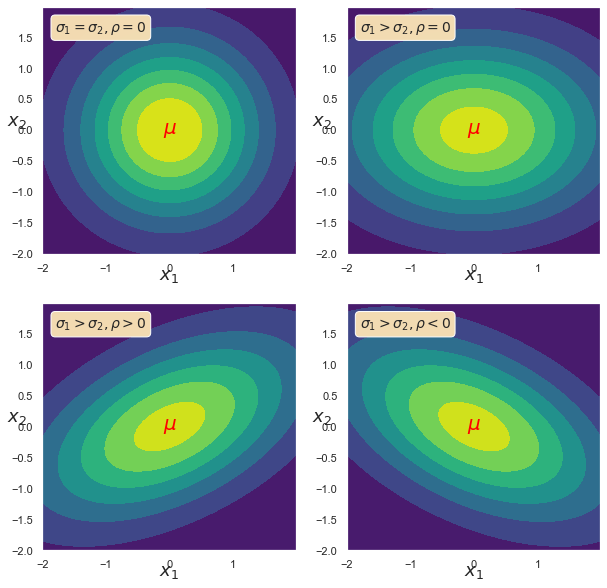

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))

# ISOTROPIC distribution
Sigma = [(1., 0.), (0., 1.)]
text = r'$\sigma_{1} =  \sigma_{2}, \rho = 0$'
display_pdf(Sigma, text, ax1)


# ANISOTROPIC and UNCORRELATED distribution
Sigma = [(2., 0.), (0., 1.)]
text = r'$\sigma_{1} >  \sigma_{2}, \rho = 0$'
display_pdf(Sigma, text, ax2)


# ANISOTROPIC and positively CORRELATED distribution
Sigma = [(2., 0.7), (0.7, 1.)]
text = r'$\sigma_{1} >  \sigma_{2}, \rho > 0$'
display_pdf(Sigma, text, ax3)


# ANISOTROPIC and negatively CORRELATED distribution
Sigma = [(2., -0.7), (-0.7, 1.)]
text = r'$\sigma_{1}  > \sigma_{2}, \rho < 0$'
display_pdf(Sigma, text, ax4)


plt.savefig("show_examples_of_PDF_isotropy_and_correlation.png", format="png")
plt.show()